# Example5 - Clustering for Automatic OMA

In this example we will see how to run multiple clustering algorithms with the new ```AutoSSI``` class.
As you can see from the import statements we are importing some specialised classes that will help us handling the analysis.

We will use one of the dataset from Example3 and Example4.
The exact natural frequencies of the system are: 

2.63186, 2.69173, 3.43042, 8.29742, 8.42882, 10.6272, 14.0053, 14.093, 17.5741

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pyoma2.algorithms.autossi import AutoSSI
from pyoma2.algorithms.data.run_params import AutoSSIRunParams, Clustering, Step1, Step2, Step3
from pyoma2.setup.single import SingleSetup
from pyoma2.support.geometry import GeometryMixin
from pyoma2.support.utils.sample_data import get_sample_data

# import data files
data = np.load(get_sample_data(filename="set1.npy", folder="3SL"), allow_pickle=True)
# Create setup instance
clust_test = SingleSetup(data, fs=100)
# decimate signal
clust_test.decimate_data(q=2)

2025-02-10 09:30:34,918 - pyoma2.support.utils.sample_data - INFO - set1.npy already exists locally. (sample_data:49)


Once we have defined the setup class we can proceed to instanciate the ```AutoSSI``` class passing to it the run parameters, such as number of block rows, maximum order etc., these are also defined within their own specific class (i.e. ```AutoSSIRunParams```)

In [2]:
# define AutoSSI run parameters
run_param = AutoSSIRunParams(ordmax=100, step=2, br=50, method="cov", calc_unc=False)

# Create autoSSI instance
autossi = AutoSSI(name="autossi", run_params=run_param)

Now we can define the clustering algorithms. The ```Clustering``` class can be defined either using the ```quick``` argument or the ```steps``` argument. The quick argument allows for a quick definition of a clustering algorithm from a list of predefined ones, while the steps require the user to define each of the three steps that make up a custom-taylored clustering algorithm. 

In [3]:
# define STEPS
# STEP1
step1 = Step1() # default values for step 1
step1_1 = Step1(sc=False, pre_cluster=True, pre_clus_typ="kmeans")
step1_2 = Step1(sc=True, pre_cluster=True, pre_clus_typ="GMM")
print("Step1 default arguments: ", Step1().model_dump(),"\n")

# STEP2
step2 = Step2(algo="hierarc", linkage="average")
step2_1 = Step2(algo="hdbscan")
step2_2 = Step2(algo="hierarc", linkage="single", dc=None, n_clusters="auto")
step2_3 = Step2(algo="affinity")
print("Step2 default arguments: ", Step2().model_dump(),"\n")

# STEP3
step3 = Step3(
    post_proc=["merge_similar", "damp_IQR", "fn_IQR", "1xorder", "min_size_gmm", "MTT"]
)
step3_1 = Step3(
    post_proc=["merge_similar", "damp_IQR", "fn_IQR", "1xorder", "min_size", "MTT"]
)
step3_2 = Step3(
    post_proc=["merge_similar", "damp_IQR", "fn_IQR", "1xorder", "min_size_pctg", "MTT"]
)
print("Step3 default arguments: ", Step3().model_dump(),"\n")

# Define Clustering algorithms
clus1 = Clustering(name="test-hierarc_avg", steps=[step1, step2, step3])
clus2 = Clustering(name="test-hdbscan", steps=[step1_1, step2_1, step3_1])
clus3 = Clustering(name="test-affinity", steps=[step1_2, step2_3, step3_2])
clus4 = Clustering(name="test-hierarc_sing", steps=[step1, step2_2, step3_1])

clus5 = Clustering(name="Dederichs", quick="Dederichs")
clus6 = Clustering(name="Reynders", quick="Reynders")
clus7 = Clustering(name="Neu", quick="Neu")
clus8 = Clustering(name="Kvaale", quick="Kvaale")

Step1 default arguments:  {'hc': True, 'hc_dict': {'xi_max': 0.1, 'mpc_lim': 0.5, 'mpd_lim': 0.5, 'CoV_max': 0.05}, 'sc': True, 'sc_dict': {'err_fn': 0.03, 'err_xi': 0.1, 'err_phi': 0.05}, 'pre_cluster': False, 'pre_clus_typ': 'GMM', 'pre_clus_dist': ['dlambda', 'dMAC'], 'transform': None} 

Step2 default arguments:  {'distance': ['dlambda', 'dMAC'], 'weights': None, 'sqrtsqr': False, 'algo': 'hierarc', 'dc': 'auto', 'linkage': 'average', 'min_size': 'auto', 'n_clusters': None} 

Step3 default arguments:  {'post_proc': ['merge_similar', 'damp_IQR', 'fn_IQR', '1xorder', 'min_size', 'MTT'], 'merge_dist': 'auto', 'min_pctg': 0.3, 'select': 'medoid', 'freq_lim': None} 



Once the clustering algorithms have been defined they are added to the ```AutoSSI``` class instance through the ```add_clustering()``` method, thereafter the ```AutoSSI``` class instance is added to the ```SingleSetup``` class instance as we normally would do. Once this is done we can execute first the ```run_by_name()``` or the ```run_all()``` methods to run the SSI itself, and then the ```run_clustering()``` or the ```run_all_clustering()``` methods to run the clustering algorithms either by name or all together respectively.

In [4]:
# Add clustering algorithms to AutoSSI class instance
autossi.add_clustering(clus1, clus2, clus3, clus4, clus5, clus6, clus7, clus8)

# add AutoSSI instance to SingleSetup instance
clust_test.add_algorithms(autossi)

# Run algorithm
clust_test.run_by_name("autossi")
# clust_test.run_all()

# Run clustering either one by one or altogether
# autossi.run_clustering("test-hierarc_avg", "test-hdbscan", "test-affinity", "test-hierarc_sing")
clust_test["autossi"].run_all_clustering()

2025-02-10 09:30:34,939 - pyoma2.setup.base - INFO - Running autossi... (base:123)
2025-02-10 09:30:34,939 - pyoma2.functions.ssi - INFO - Assembling Hankel matrix method: cov... (ssi:82)
2025-02-10 09:30:35,194 - pyoma2.functions.ssi - INFO - SSI for increasing model order... (ssi:321)
100%|█████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 7779.38it/s]
2025-02-10 09:30:35,214 - pyoma2.functions.ssi - INFO - Calculating modal parameters for increasing model order... (ssi:486)
100%|██████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 823.28it/s]
2025-02-10 09:30:35,277 - pyoma2.algorithms.autossi - INFO - Running clustering test-hierarc_avg... (autossi:196)
2025-02-10 09:30:36,697 - pyoma2.algorithms.autossi - INFO - Running clustering test-hdbscan... (autossi:196)
2025-02-10 09:30:40,764 - pyoma2.algorithms.autossi - INFO - Running clustering test-affinity... (autossi:196)
2025-02-10 09:30:42,882 - pyoma2.algorithms.autossi - INFO

Once the clusterings have been executed we can access the results and make some plots.

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Stabilization Chart with Clusters Kvaale'}, xlabel='Frequency [Hz]', ylabel='Model Order'>)

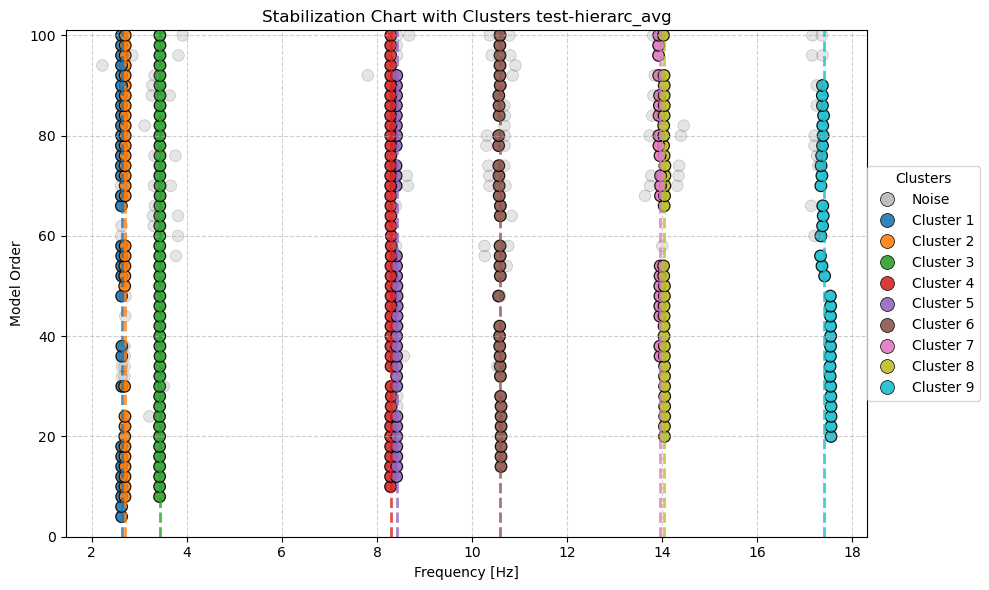

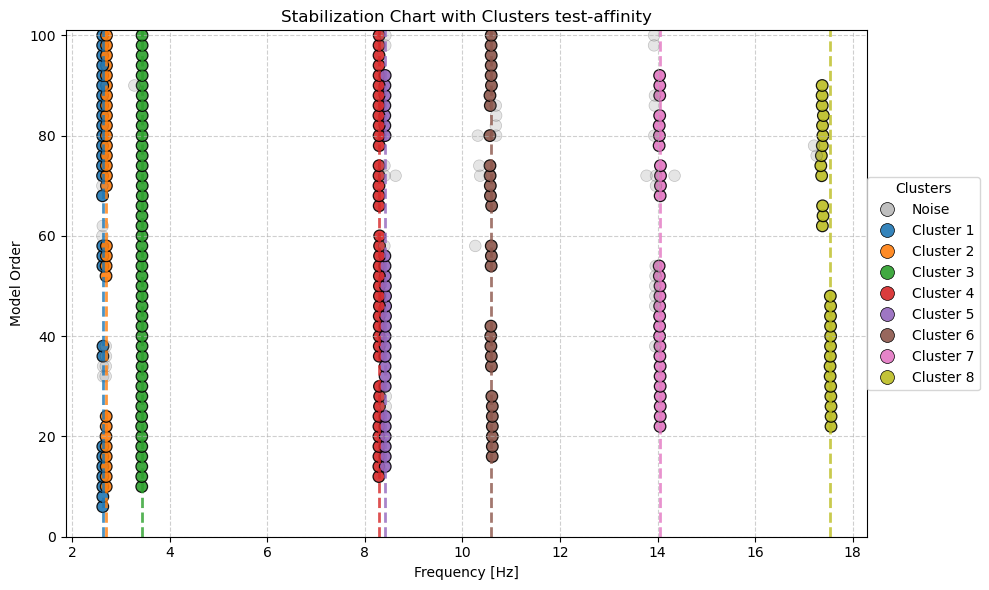

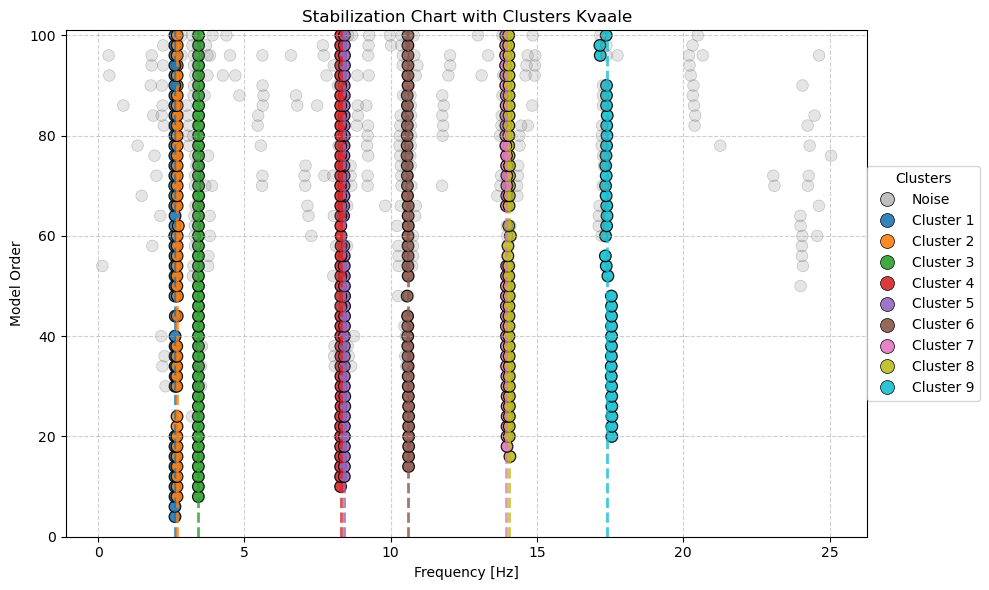

In [5]:
# Plot stabilisation diagram with clusters
autossi.plot_stab_cluster("test-hierarc_avg")
autossi.plot_stab_cluster("test-affinity")
autossi.plot_stab_cluster("Kvaale")

We can also plot the frequency vs damping plot of the clustering

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Frequency vs Damping - Clusters Reynders'}, xlabel='Frequency [Hz]', ylabel='Damping [%]'>)

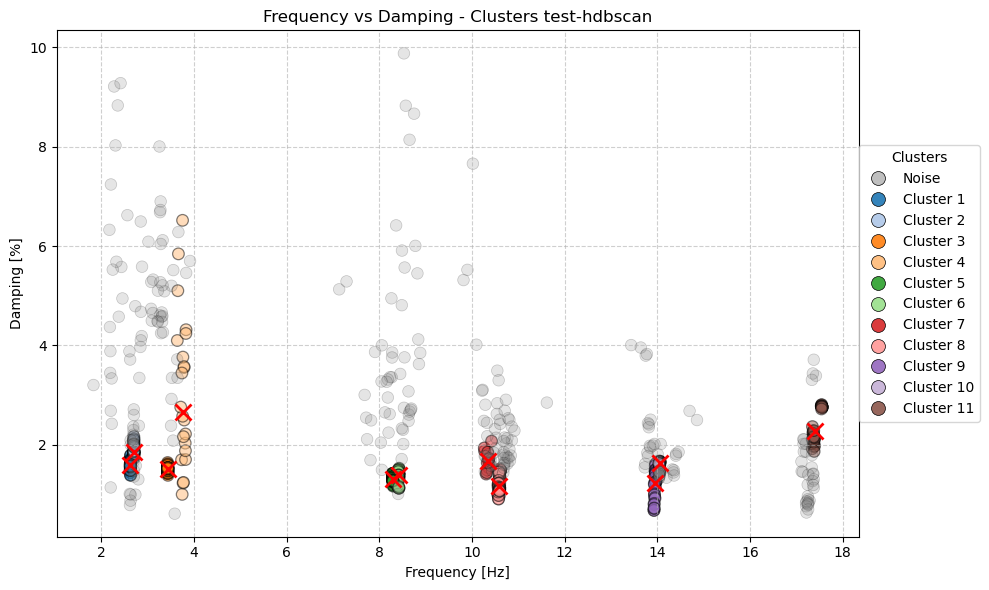

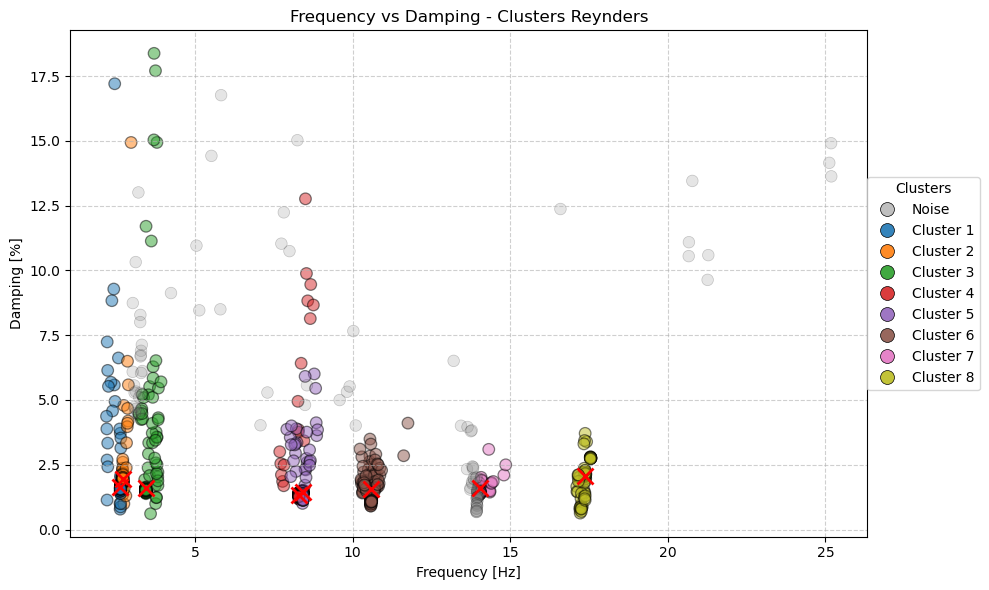

In [6]:
autossi.plot_freqvsdamp_cluster("test-hdbscan")
autossi.plot_freqvsdamp_cluster("Reynders")

The clustering results are stored in the the two specialised classes ```ClusteringResult``` and ```AutoSSIResult```. The results can be accessed through the ```clustering_results``` atrribute, which is available within the ```result``` attribute.

In [7]:
print(autossi.result.clustering_results.keys(),"\n")
print("Frequencies found by the ´test-hierarc_sing´ algorithm: ", autossi.result.clustering_results["test-hierarc_sing"].Fn,"\n")
print("Frequencies found by the ´Neu´ algorithm: ", autossi.result.clustering_results["Neu"].Fn,"\n")
print("Frequencies found by the ´Dederichs´ algorithm: ", autossi.result.clustering_results["Dederichs"].Fn,"\n")

dict_keys(['test-hierarc_avg', 'test-hdbscan', 'test-affinity', 'test-hierarc_sing', 'Dederichs', 'Reynders', 'Neu', 'Kvaale']) 

Frequencies found by the ´test-hierarc_sing´ algorithm:  [ 2.62479028  2.70024503  3.43124183  8.29042074  8.41485197 10.58865923
 13.93432515 14.03263282 17.3754739 ] 

Frequencies found by the ´Neu´ algorithm:  [ 2.6264273   3.43036202  8.29328282  8.41371732 10.57092528 13.95338341
 14.04590463 17.37763455] 

Frequencies found by the ´Dederichs´ algorithm:  [ 2.62617443  2.6983084   3.43026181  8.29328282  8.41299706 10.58747653
 13.95293514 14.05845197 17.42123566] 



In order to evaluate the distances between the poles the ```plot_dtot_distrib()``` method can be used. This method is especially useful to evaluate the cut-off distance used in the hierarchical clustering.

(<Figure size 1000x600 with 2 Axes>,
 <Axes: title={'center': 'Histogram of distances'}, xlabel='dtot', ylabel='Frequency'>)

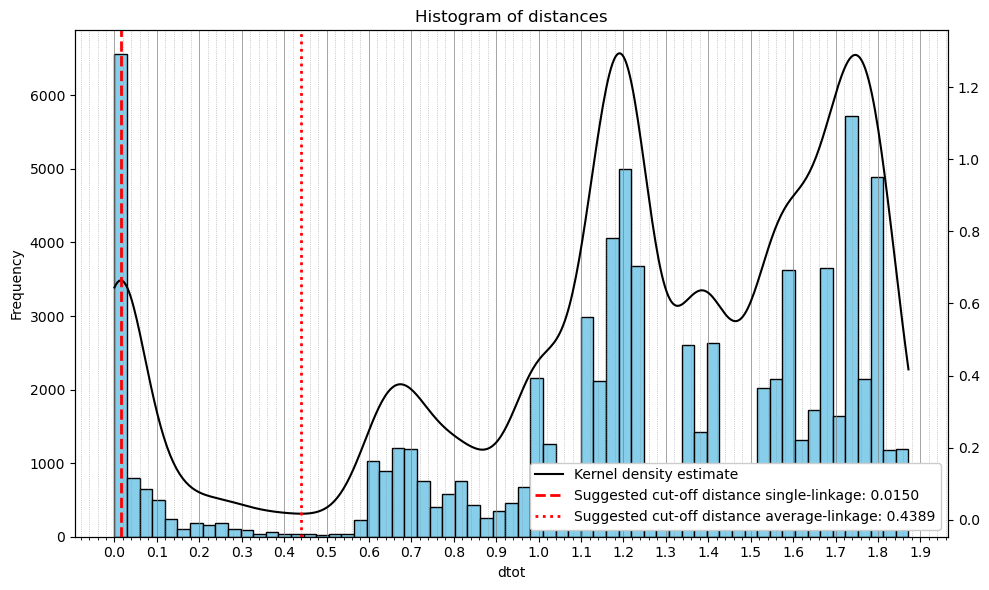

In [8]:
autossi.plot_dtot_distrib("test-hierarc_avg")